In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step:1
#read the data set

In [104]:
df = pd.read_csv("n_movies.csv")
print(df)
df.head()



                       title         year certificate duration  \
0                  Cobra Kai     (2018– )       TV-14   30 min   
1                  The Crown     (2016– )       TV-MA   58 min   
2           Better Call Saul  (2015–2022)       TV-MA   46 min   
3              Devil in Ohio       (2022)       TV-MA  356 min   
4     Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   
...                      ...          ...         ...      ...   
9952          The Imperfects     (2022– )       TV-MA   45 min   
9953        The Walking Dead  (2010–2022)       TV-MA   44 min   
9954               The Crown     (2016– )       TV-MA   58 min   
9955            Supernatural  (2005–2020)       TV-14   44 min   
9956           Devil in Ohio       (2022)       TV-MA  356 min   

                             genre  rating  \
0            Action, Comedy, Drama     8.5   
1        Biography, Drama, History     8.7   
2                     Crime, Drama     8.9   
3           Drama, Horr

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


#step: 2
#inspected the data and observed data structure

In [105]:
df.info()
print(df.describe()) # Changed inplace="True" to printing the result
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB
            rating
count  8784.000000
mean      6.764515
std       1.214840
min       1.700000
25%       6.100000
50%       6.900000
75%       7.600000
max       9.900000


(9957, 9)

#step: 3
#checked null values

In [106]:
df.isnull().sum()

,0
title,0
year,527
certificate,3453
duration,2036
genre,73
rating,1173
description,0
stars,0
votes,1173


#step: 4
#clened the data
#dropped the unnecessary data using dropna
#filled missed tex values with unknown and numericals by using agggregations using fillna

In [107]:
df.dropna(subset=['duration','certificate'], inplace=True)
df["year"] =df["year"].fillna("unknown")
df["genre"] =df["genre"].fillna("unknown")
df['rating']= df['rating'].fillna(df['rating'].mean())
df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=False) # Remove commas
df['votes']= pd.to_numeric(df['votes'], errors='coerce') # Convert to numeric, coercing errors to NaN
df['votes'] =df['votes'].fillna(df['votes'].median())

#step:5
# rechecked the null values after cleaning
#To esure there are no null values

In [108]:
df.isnull().sum()

,0
title,0
year,0
certificate,0
duration,0
genre,0
rating,0
description,0
stars,0
votes,0


step: 6
EDA - Exploatory Data Analysis
### Netflix Releases Per Year

#This chart shows how many titles Netflix released each year (from 1980 onward).  
#We cleaned the data to include only valid 4-digit years.  

#Netflix started slowly until 2010  
# From 2015, releases increased rapidly  
# The highest number of titles came between 2018 and 2020  

#This growth reflects Netflix’s global expansion and focus on original content.



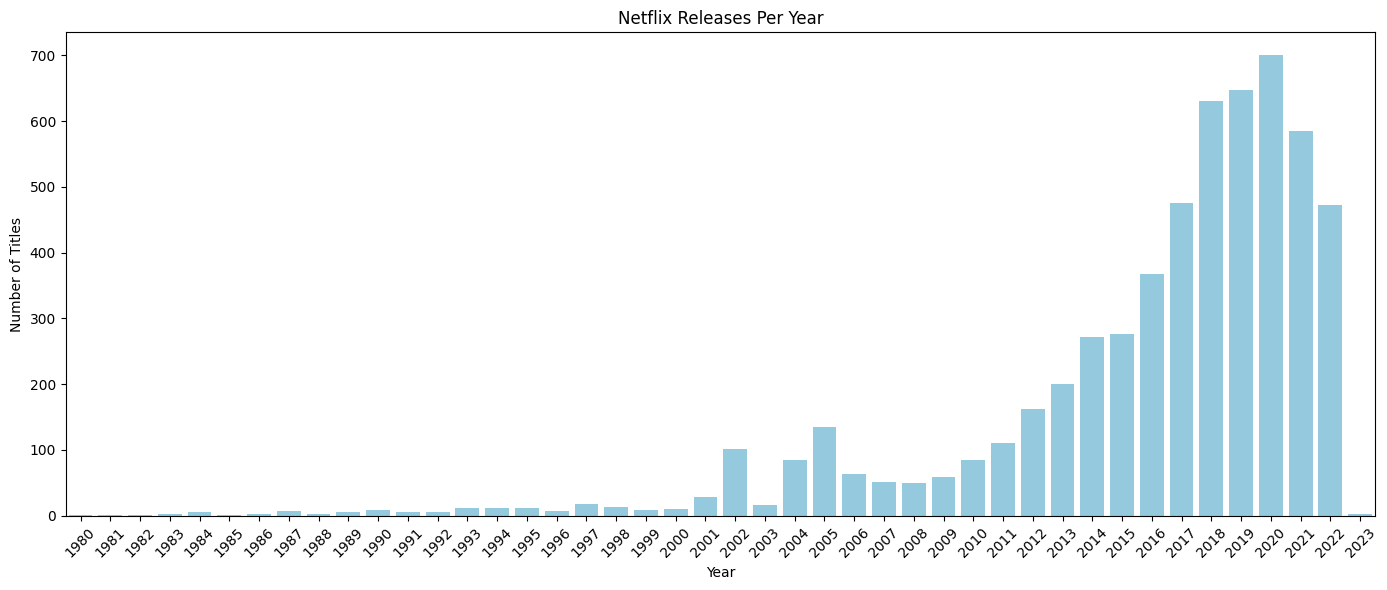

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and prepare 'year'
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
df_filtered = df[df['year'] >= 1980]  # Optional filter

# Prepare data
year_counts = df_filtered['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=year_counts, x='year', y='count', color='skyblue')
plt.title("Netflix Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#step 7
#Top shows by votes or rating
#Number of votes helps to understand the audience with high engagement
#Rating help to know shows that are critically acclaimed

In [110]:
df.sort_values(by='votes', ascending=False).head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes
9921,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0
20,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055.0
9951,Breaking Bad,2008,TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0
7,Breaking Bad,2008,TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831340.0
57,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0
78,The Lord of the Rings: The Two Towers,2002,PG-13,179 min,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0
153,Gladiator,2000,R,155 min,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0
173,The Departed,2006,R,151 min,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"['Martin Scorsese', '| ', ' Stars:', 'Leona...",1310171.0
96,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746.0
9948,Stranger Things,2016,TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149902.0


#step: 8
#feature enjineering
#explore top/popular shows
#created a column for popular based on vote count
#created rating_level column: low, mid, high rated shows using `pd.cut()


In [111]:
df['popular'] = np.where(df['votes']> 50000, "yes", "no")
df["rating_level"]= pd.cut(df['rating'], bins=[0, 5, 7, 10], labels=['low', 'mid', 'high'])

#step: 9
#In this step, we visualize key relationships and content trends in the Netflix dataset.

#What we’ll explore:
#The relationship between number of votes and average rating
#The most frequent genres in the dataset

#These charts help us understand how user engagement (votes) aligns with ratings and which types of content are most common.

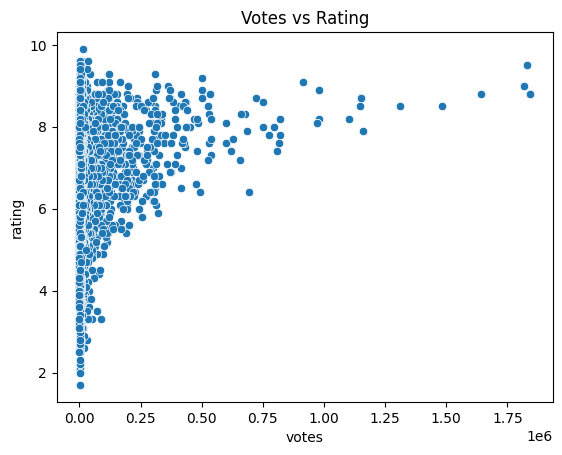

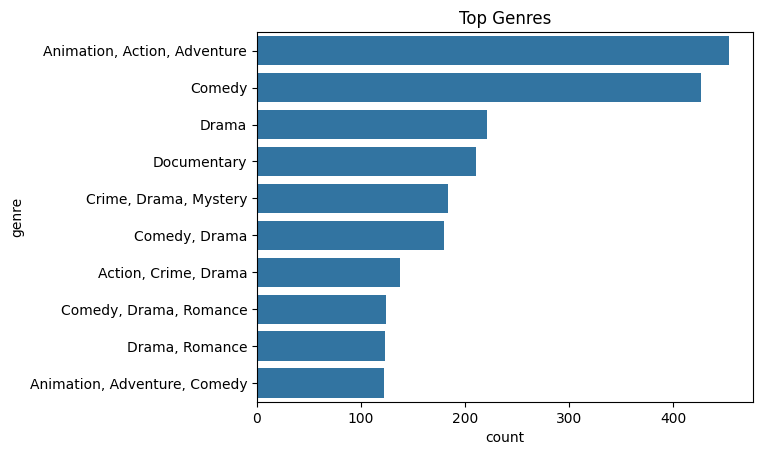

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating vs Votes
sns.scatterplot(x="votes", y="rating", data=df)
plt.title("Votes vs Rating")
plt.show()

# Count by Genre
sns.countplot(y="genre", data=df, order=df["genre"].value_counts().index[:10])
plt.title("Top Genres")
plt.show()


#step: 10
#reloaded the cleaned, analyzed data as csv file

In [113]:
df.to_csv("netflix_cleaned.csv", index=False)